<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_5/blob/main/Tutorials/tutorial_3/0_images_io.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting images from Astro Catalogues

Anyone can download astronomical images for image analysis.

Most (almost all) astronomy images are in catalogues and they are free to use.

In [1]:
# Import libraries
from astropy.io import fits
from astropy.utils.data import download_file
import matplotlib.pyplot as plt

In [2]:
# Download a sample FITS file (Horsehead Nebula)
# This will download the file to a cache directory
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [3]:
# Open the FITS file
with fits.open(image_file) as hdu1:
    # Take the first channel (some images have more than 1 channel)
    data = hdu1[0].data # this is a numpy array
    header = hdu1[0].header # this contains the metadata

In [4]:
#print(header)
#print(type(data))
#print(data.shape)

## Visualisation

### Image in pixels

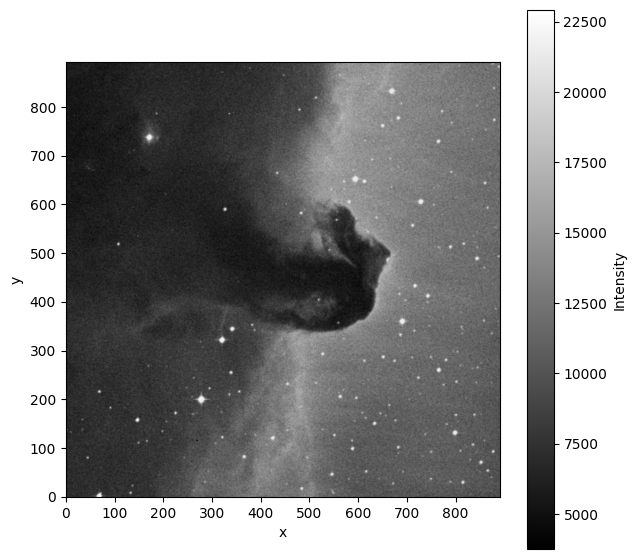

In [5]:
# Figure environment
plt.figure(figsize=(7, 7))

#plt.title('Horsehead Nebula')

plt.imshow(data, cmap='gray', origin='lower') # 'origin=lower' is common for FITS images

# Add colour bar
plt.colorbar(label='Intensity')

# Axis labels
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Image in astronomical WCS coordinates

World Coordinate System (WCS): https://docs.astropy.org/en/latest/wcs/index.html

In [6]:
from astropy.wcs import WCS

In [7]:
# Create a WCS object from the FITS header
wcs = WCS(header)

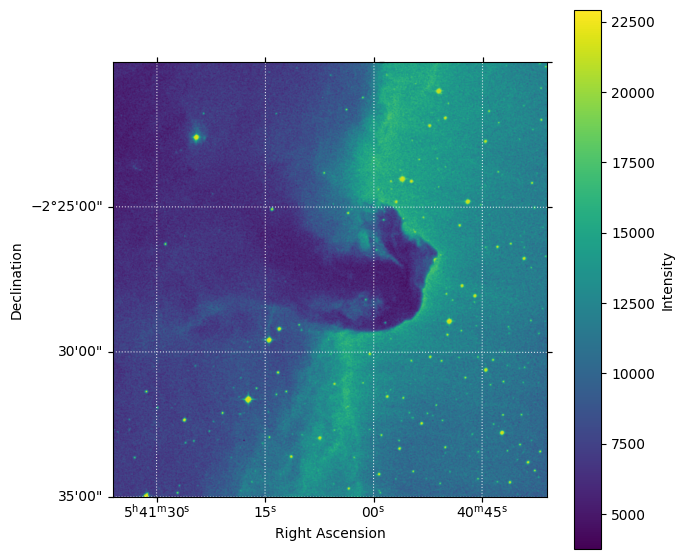

In [8]:
# New figure environment
fig = plt.figure(figsize=(7, 7))

#plt.title('Horsehead Nebula')
ax = fig.add_subplot(111, projection=wcs)

# Display image
im = ax.imshow(data, cmap='viridis', origin='lower')

# Celestial coordinate grid lines and labels
ax.coords.grid(True, color='white', linestyle='dotted', alpha=0.8) # Add grid lines
ax.coords[0].set_axislabel('Right Ascension') # RA axis
ax.coords[1].set_axislabel('Declination')     # Dec axis

# Set formatter for better tick labels (hours/minutes for RA, degrees/arcmin for Dec)
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')

plt.colorbar(im, label='Intensity') # Colorbar needs the image object to correctly map values

plt.show()

### Example: Fetch another image from the Astropy Database:

http://www.astropy.org/astropy-data/

Let's fetch the Hercules Globular Cluster:

https://en.wikipedia.org/wiki/Messier_13

- A globular cluster is a collection of stars bound together by gravity.

- There are more stars towards the globular cluster centre.

In [9]:
# Import libraries
from google.colab import drive

In [10]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/MyDrive
!mkdir epic5

/content/drive/MyDrive
mkdir: cannot create directory ‘epic5’: File exists


In [12]:
%cd /content/drive/MyDrive/epic5

!mkdir FITS_files

%cd FITS_files

/content/drive/MyDrive/epic5
mkdir: cannot create directory ‘FITS_files’: File exists
/content/drive/MyDrive/epic5/FITS_files


In [13]:
# Define the URL of the FITS file
!wget 'http://data.astropy.org/tutorials/FITS-images/M13_blue_0001.fits'

--2025-08-05 17:57:01--  http://data.astropy.org/tutorials/FITS-images/M13_blue_0001.fits
Resolving data.astropy.org (data.astropy.org)... 192.64.119.61
Connecting to data.astropy.org (data.astropy.org)|192.64.119.61|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.astropy.org/astropy-data/tutorials/FITS-images/M13_blue_0001.fits [following]
--2025-08-05 17:57:01--  http://www.astropy.org/astropy-data/tutorials/FITS-images/M13_blue_0001.fits
Resolving www.astropy.org (www.astropy.org)... 185.199.111.153, 185.199.109.153, 185.199.108.153, ...
Connecting to www.astropy.org (www.astropy.org)|185.199.111.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2900160 (2.8M) [image/fits]
Saving to: ‘M13_blue_0001.fits.1’

M13_blue_0001.fits. 100%[===================>]   2.77M  --.-KB/s    in 0.07s   

2025-08-05 17:57:01 (38.9 MB/s) - ‘M13_blue_0001.fits.1’ saved [2900160/2900160]



In [14]:
#!ls -ltr

In [15]:
M13_hdu = fits.open("./M13_blue_0001.fits")

In [16]:
data = M13_hdu[0].data # this is a numpy array
header = M13_hdu[0].header # this contains the metadata

In [17]:
#print(data.shape)

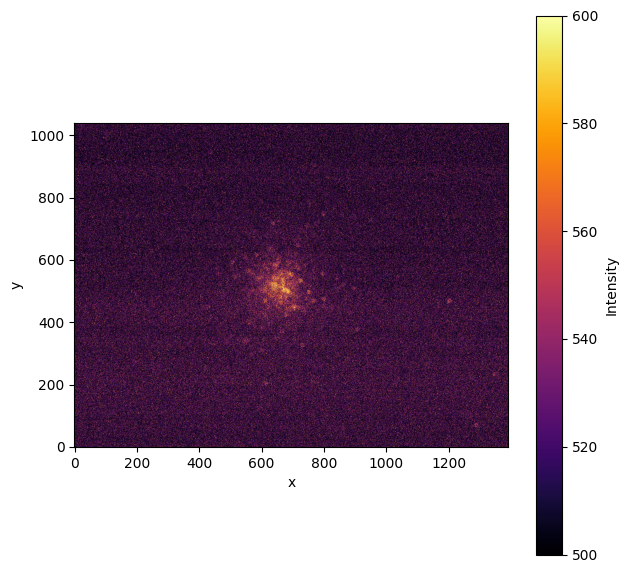

In [18]:
# Figure environment
plt.figure(figsize=(7, 7))

#plt.title('Horsehead Nebula')

plt.imshow(data, cmap='inferno', origin='lower', vmin= 500, vmax = 600) # 'origin=lower' is common for FITS images

# Add colour bar
plt.colorbar(label='Intensity')

# Axis labels
plt.xlabel('x')
plt.ylabel('y')

plt.show()

## Get galaxy image

In [19]:
# Define the URL of the FITS file
!wget 'https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_3184_NA_MOM0_THINGS.FITS'

--2025-08-05 17:57:03--  https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_3184_NA_MOM0_THINGS.FITS
Resolving www2.mpia-hd.mpg.de (www2.mpia-hd.mpg.de)... 149.217.71.7
Connecting to www2.mpia-hd.mpg.de (www2.mpia-hd.mpg.de)|149.217.71.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4253760 (4.1M) [text/plain]
Saving to: ‘NGC_3184_NA_MOM0_THINGS.FITS.1’

NGC_3184_NA_MOM0_TH 100%[===================>]   4.06M   921KB/s    in 6.2s    

2025-08-05 17:57:10 (671 KB/s) - ‘NGC_3184_NA_MOM0_THINGS.FITS.1’ saved [4253760/4253760]



In [20]:
gal1 = fits.open("./NGC_3184_NA_MOM0_THINGS.FITS")

#print(type(gal1))

In [21]:
# Look at the header
head_gal1 = gal1[0].header
#print(head_gal1)

keys_gal1 = gal1[0].header.keys

#print(keys_gal1)

In [22]:
# Look at the data

data_gal1 = gal1[0].data

#print(type(data_gal1), data_gal1.shape)

In [23]:
# Get data into an image
imag_gal1 = gal1[0].data[0,0,:,:]

#print(imag_gal1.shape)

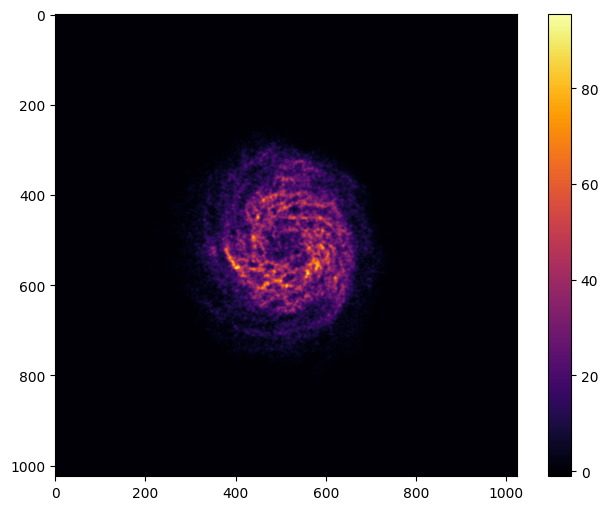

In [24]:
# See the image: Fig Env.

plt.figure(figsize=(8,6))

surf = plt.imshow(imag_gal1, cmap = "inferno")

plt.colorbar(surf)

plt.show()

###  Isolate the galaxy: thresholding (pixel histogram)

In [25]:
# Get # of pixels
#print(imag_gal1.size)

# See min/max
#print(np.min(imag_gal1_1d), np.max(imag_gal1_1d))

In [26]:
# Flatten the 2D image
imag_gal1_1d = imag_gal1.reshape((imag_gal1.size,1))
#imag_gal1_1d = imag_gal1.flatten()

#print(imag_gal1.shape, imag_gal1_1d.shape)

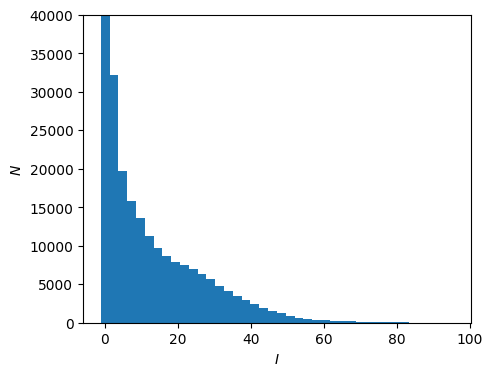

In [27]:
# Make a pixel histogram

plt.figure(figsize=(5,4))

plt.hist(imag_gal1_1d, bins = 40)

plt.xlabel(r"$I$")
plt.ylabel(r"$N$")

plt.ylim(0,40000)
plt.show()